In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import time


In [ ]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
type(soup)


In [ ]:
# Get the title
title = soup.title
print(title)

# Print out the text
text = soup.get_text()
#print(soup.text)
soup.find_all('a')


In [15]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])


mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None
[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/log

In [19]:
"""convert such table data to a Python Pandas dataframe for easier transformation and analysis
 You should get all of the table’s rows in list form first and then convert that list into a pandas dataframe."""

for row in rows:
  row_td = row.find_all('td')
print(row_td)
type(row_td)


[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [ ]:
#To remove html tags using Beautiful Soup, pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags.

str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)


In [ ]:
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)


In [25]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


In [27]:
#Data Transformation
df1 = df[0].str.split(',', expand=True)
df1.head(10)
df1[0] = df1[0].str.strip('[')
df1.head(10)


,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [28]:
#The table is missing table headers. So go back to BeautifulSoup and use its find_all() method to get the table headers.

col_labels = soup.find_all('th')
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)


['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']


In [32]:
#Next convert the table headers to a new pandas dataframe.

df2 = pd.DataFrame(all_header)
df2.head()

#Again, split column "0" into multiple columns at the comma position for all rows.

df3 = df2[0].str.split(',', expand=True)
df3.head()

#Next, concatenate the two dataframes into one using the concat() method.

frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

#Next, re-configure the data frame so that the first row is the table header.

df5 = df4.rename(columns=df4.iloc[0])
df5.head()





,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


In [33]:
#Behold all of the progress that you have made! At this point, the table is almost properly formatted. For analysis, start by getting an overview of the data as shown below.

df5.info()
df5.shape


<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

In [34]:
# transform it again to drop all rows with any missing values.
df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape


<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     578 non-null    object
 1    Bib       578 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.2+ KB


(578, 9)

In [35]:
#Notice how the table header is replicated as the first row in df5 and df6. Drop this redundant row like this:

df7 = df6.drop(df6.index[0])
df7.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [37]:
#Clean up the headers a bit more by renaming the '[Place' and ' Team]' columns. Python is picky about whitespace. Make sure you include a space after the quotation mark in ' Team]'.

df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

#The final data cleaning step involves removing the closing bracket for cells in the "Team" column.
df7['Team'] = df7['Team'].str.strip(']')
df7.head()



,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [47]:
#Data Analysis and Visualization
#1.what was the average finish time (in minutes) for the runners?

time_list = df7[' Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    parts = i.split(':')
    seconds = 0
    if len(parts) == 3:  # H:M:S format
        h, m, s = parts
        seconds = int(h) * 3600 + int(m) * 60 + int(s)
    elif len(parts) == 2:  # M:S format
        m, s = parts
        seconds = int(m) * 60 + int(s)
    else:
        print(f"Unexpected time format: {i}")
        continue

    time_in_mins = seconds / 60
    time_mins.append(time_in_mins)

print(time_mins)


[36.35, 36.7, 37.733333333333334, 38.56666666666667, 39.35, 39.81666666666667, 40.06666666666667, 40.083333333333336, 40.28333333333333, 40.35, 40.46666666666667, 40.6, 40.71666666666667, 41.016666666666666, 41.31666666666667, 41.71666666666667, 41.983333333333334, 42.38333333333333, 42.483333333333334, 42.583333333333336, 42.6, 42.61666666666667, 42.93333333333333, 43.43333333333333, 43.45, 43.666666666666664, 43.7, 43.71666666666667, 43.766666666666666, 43.766666666666666, 43.78333333333333, 43.78333333333333, 44.06666666666667, 44.083333333333336, 44.1, 44.11666666666667, 44.38333333333333, 44.63333333333333, 44.68333333333333, 44.7, 44.8, 45.05, 45.083333333333336, 45.166666666666664, 45.18333333333333, 45.18333333333333, 45.21666666666667, 45.233333333333334, 45.25, 45.28333333333333, 45.45, 45.46666666666667, 45.483333333333334, 45.6, 45.6, 45.666666666666664, 45.666666666666664, 45.81666666666667, 45.916666666666664, 46.03333333333333, 46.21666666666667, 46.333333333333336, 46.3

In [48]:
#Next, convert the list back into a dataframe and create a new column ("Runner_mins") for runner chip times expressed in just minutes.

df7['Runner_mins'] = time_mins
df7.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Runner_mins
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,,36.350000
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...,36.700000
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,,37.733333
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,,38.566667
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...,39.350000


In [51]:
#Pandas provides a handy “describe” method that computes a generous list of explanatory statistics for the dataframe.


df7.describe(include=[np.number])


,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5


df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])


In [ ]:
#2.Did the runners' finish times follow a normal distribution?


x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


In [ ]:
#3.Were there any performance differences between males and females of various age groups?
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()


In [65]:
#descriptive statistics to the visual plot, then use the pandas groupby() method to compute summary statistics for males and females separately.

g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)


        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


Text(0.5, 0.98, '')

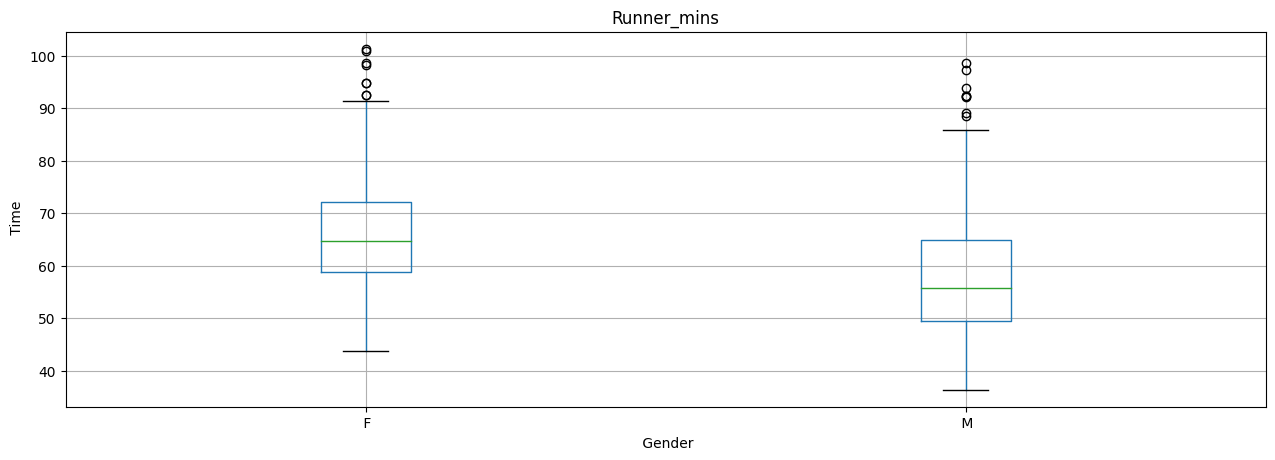

In [66]:
#display a side-by-side boxplot comparison of male and female finish times.
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel(' Time')
plt.suptitle("")
